# Time series forcasting fundamentals with Milestone Project 3: BitPredict

I will use TensorFlow to predict the price of Bitcoin based on historical prices.

## Get Data

Using the historical data of bitcoin to predict the future price of Bitcoin. Downloaded the data from: https://www.coindesk/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-07 20:00:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-02-07 20:00:54 (60.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import time series data with pandas

In [2]:
# Import with pandas
import pandas as pd

# read in data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"]) # parse the date column and frame the index column(column 1) is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples
len(df)

2787

In [6]:
# How many years
2787 / 365

7.635616438356164

> 7.6 years of data.

In [7]:
# reduce df to only include data and closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


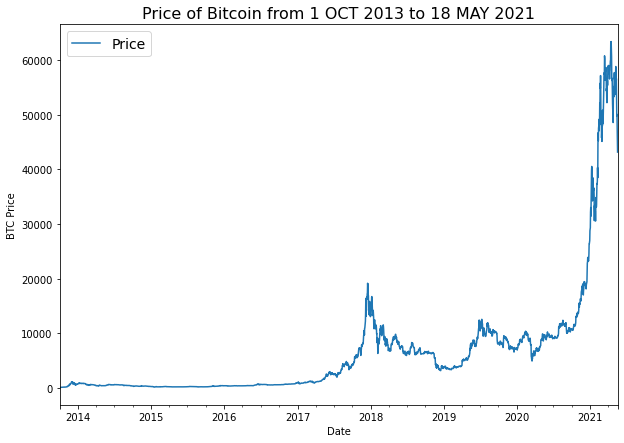

In [8]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 MAY 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module (for fun)

In [9]:
# Importing and formatting historical bitcoid data with Python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip header row
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as string and convert to datetime objects
    btc_price.append(float(line[2])) # get the closing price as float

# view first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

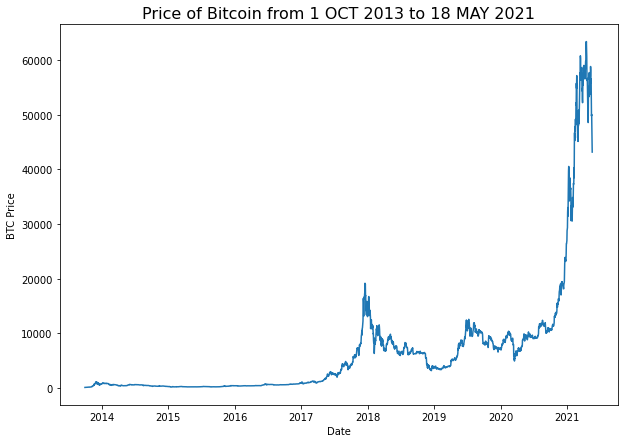

In [10]:
# plot from CSV
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 MAY 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets for time series data

### Creating train and test sets with time series data (the wrong way)

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [12]:
# check
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
# wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC Prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

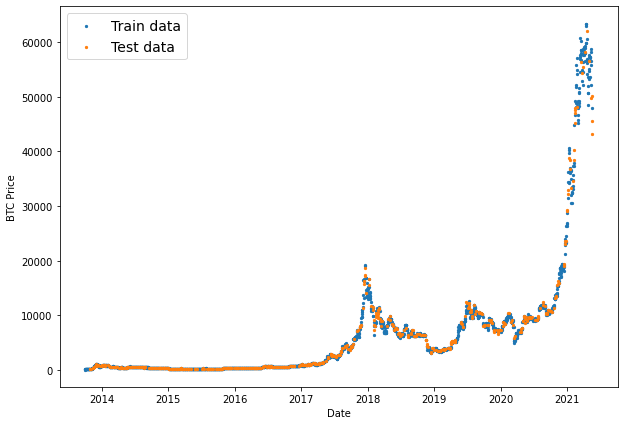

In [14]:
# plot the wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

> Using the randomized `train_test_split` method breaks sequences and introduces data leakage. Need to segment the time series such that the latter portion of the datetimes provide a mock "future" state of the information to test against.

### Create train and test sets for time series (the right way)

In [15]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train - 20% test

# create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create the test data splits (everything after the split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

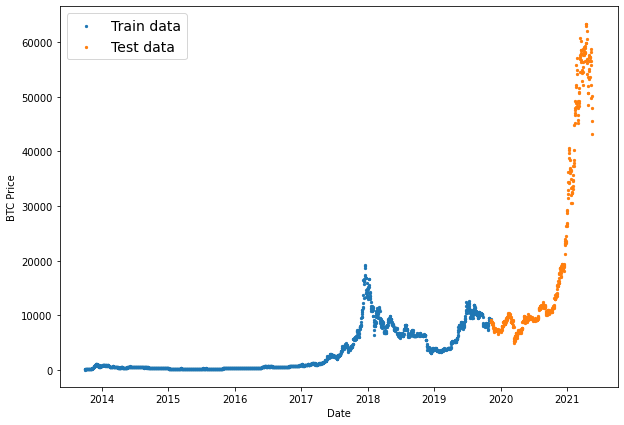

In [16]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [17]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps

  Parameters
  -------------------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to the start the plot, picks a starting index within the data to offset start time
  end: similar to start, choose index of where to end the series
  label: label to show on plot about values, default None
  """
  # plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

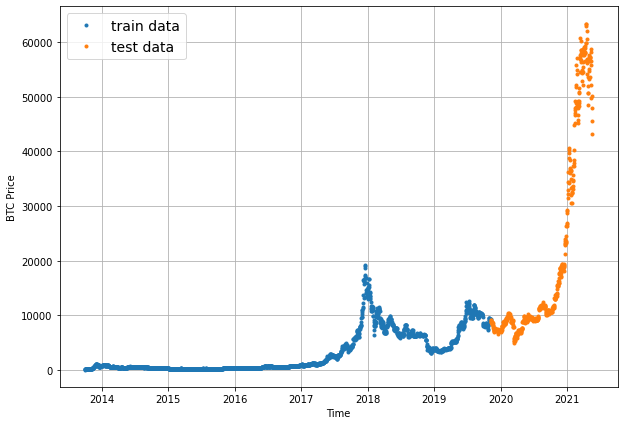

In [18]:
# test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")

## Modeling Experiments

**Horizon**: Number of timesteps into the future we will predict

**Window Size**: number of timesteps we're going to use to predict the horizon

Experiments:
0. Naive (baseline)
1. Dense horizon = 1, window = 7
2. Dense horizon = 1, window 30
3. Dense horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as model 1 (Dense) but will use multivariate data
7. N-BEATS
8. Ensemble
9. Future Prediction Model (no data to guage the validity of predictions)
10. Same as 1 with turkey data

## Model 0: Navie forecast (baseline

Formula:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 for a horizon of 1.

The means that for any horizon of 1 the model will simply predict that it was the previous timesteps value. e.g., if I attempted to predict the value of a given stock tomorrow, it would simply be predicted to be the same price as today.

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

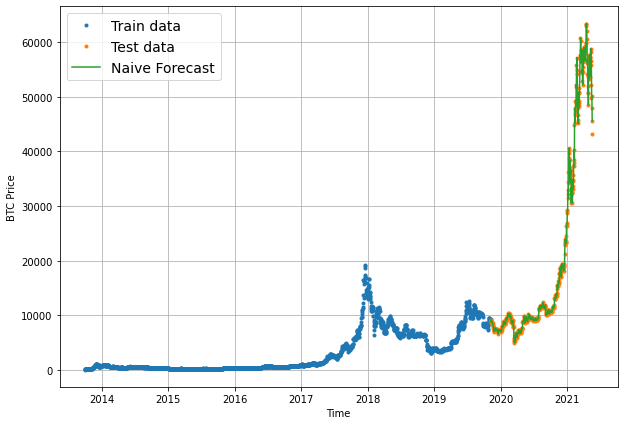

In [20]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

## Evaluating a time series model

Time series is a form of regression problem due to it's continuous nature.

Metrics:
* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* MAPE - Mean Absolute Percentage Error
* MASE - Mean Absolute Scaled Error

> For all metrics, a **lower** the value the more performant (generally)

In [21]:
import tensorflow as tf

In [22]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality)
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # data is collected daily, shifting 1 day

  return mae / mae_naive_no_season

In [23]:
# Test MASE, this value should be 1 relative to the Naive model
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [24]:
# Create a function to take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  # ensure float32 data type
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
  }

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Part 2: Windowing our dataset

Windowing the data allows me to turn this into a supervised learning problem.

```
Windowing for one week

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

```

In [28]:
# What I am doing with the Bitcoin data
print(f"I want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

I want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [29]:
# Set up of global variables for window and horizon size
HORIZON = 1 # future quantity of timestamps, this is 1 day
WINDOW_SIZE = 7 # use the past week to make the prediction

In [30]:
# Create function to label windowed data
def get_labeled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g., if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [31]:
# test the windowed data labeling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


The function will:
1. Create a window step of specific window size(e.g., [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```
3. Use the 2D array of multiple window steps to index on a target series (e.g., the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the windows steps into windows with a specified horizon.

**NOTE**: [Fast and Robust Sliding Window Vectorization with NumPy](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5) Author: Syafiq Kamarul Azman

In [32]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labeled windows of window_size with horizon size labels.
  """
  # Create a window of a specific window size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # Create a 2D array of multiple window steps (minus 1 to account for zero indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon) - 1), axis=0).T # create 2D array of windows of size window size

  print(f"Window index:\n {window_indexes, window_indexes.shape}")

  # Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  
  # get the labeled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=HORIZON)

  return windows, labels

In [33]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window index:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2775, 2776, 2777, ..., 2780, 2781, 2782],
       [2776, 2777, 2778, ..., 2781, 2782, 2783],
       [2777, 2778, 2779, ..., 2782, 2783, 2784]]), (2778, 8))


(2778, 2778)

In [34]:
# View first 3 labels and windows
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [35]:
# View last 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i - 3]} -> Label {full_labels[i - 3]}")

Window: [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698] -> Label [49764.1320816]
Window: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ] -> Label [50032.69313676]
Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]


In [36]:
prices[2778]

58102.1914262342

In [37]:
prices[-1]

43144.4712908603

> **NOTE**: `tf.keras.preprocessing.timeseries_dataset_from_array()` exists and does the same thing

## Turning windows into training and test sets

In [38]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  splits_size = int(len(windows) * (1 - test_split)) # This will default to 80% train and 20% test
  
  # train
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  # test
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [39]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 549, 2229, 549)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814, 8749.52059102],
        [8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ],
        [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
         8500.64355816, 8469.2608989 , 8537.33965197]]),
 array([[8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]))

## Make a modeling checkpoint

Creating model checkpoint to compare best performance between each model.

In [42]:
import os

# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output critical notifications
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

* Single dense layer with 128 hidden units and ReLU
* An output layer with linear or no activation (direct passthrough due to numeric prediction)
* Adam optimization and MAE loss function
* Batch size of 128 (data is very small, no need for 32)
* 100 Epochs

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is a passthrough
], name="model_1_dense") # name, for saving

# compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 7s 101ms/step - loss: 770.8699 - mae: 770.8699 - mse: 2322506.0000 - val_loss: 2169.7632 - val_mae: 2169.7632 - val_mse: 11541335.0000
Epoch 2/100
18/18 [==============================] - 1s 71ms/step - loss: 231.9996 - mae: 231.9996 - mse: 235887.3438 - val_loss: 983.4808 - val_mae: 983.4808 - val_mse: 3191200.5000
Epoch 3/100
18/18 [==============================] - 1s 56ms/step - loss: 176.6515 - mae: 176.6515 - mse: 158764.5156 - val_loss: 914.9366 - val_mae: 914.9366 - val_mse: 2699447.2500
Epoch 4/100
18/18 [==============================] - 1s 76ms/step - loss: 163.9299 - mae: 163.9299 - mse: 144408.6562 - val_loss: 894.7849 - val_mae: 894.7849 - val_mse: 2564592.5000
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 158.4962 - mae: 158.4962 - mse: 135340.4844 - val_loss: 899.1835 - val_mae: 899.1835 - val_mse: 2492474.2500
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 152.126

In [44]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [45]:
# evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 592.5184 - mae: 592.5184 - mse: 1215353.2500


[592.5183715820312, 592.5183715820312, 1215353.25]

In [46]:
# load in best performing weights for model
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 562.1569 - mae: 562.1569 - mse: 1155685.6250


[562.1568603515625, 562.1568603515625, 1155685.625]

## Making forecasts with the model (on test dataset)

Need a function to:
1. Take in a trained model
2. Takes in some input data (same type of data as it was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions 

In [47]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input data
  """
  forecast = model.predict(input_data)
  
  return tf.squeeze(forecast) # return 1D array of predictions

In [48]:
# Make predictions on the test dataset
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(549, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8753.917 , 8694.883 , 8529.391 , 8478.01  , 8532.248 , 8275.483 ,
        8132.8237, 8078.055 , 7702.991 , 7311.736 ], dtype=float32)>)

In [49]:
test_labels[:10]

array([[8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599],
       [8118.4885358 ],
       [8074.84317361],
       [7612.7405735 ],
       [7262.11053495],
       [7303.40575852]])

In [50]:
# evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

In [51]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

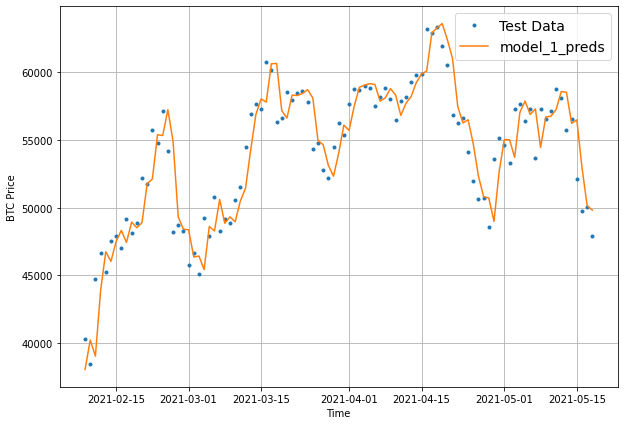

In [52]:
# Plot model 1 predictions
offset = 450
plt.figure(figsize=(10,7))

# account for the test_window offset and index into the test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [53]:
# set global variables
HORIZON = 1 # 1 day
WINDOW_SIZE = 30 # use 30 time steps (approximately 1 month)

In [54]:
# make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window index:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2752, 2753, 2754, ..., 2780, 2781, 2782],
       [2753, 2754, 2755, ..., 2781, 2782, 2783],
       [2754, 2755, 2756, ..., 2782, 2783, 2784]]), (2755, 31))


(2755, 2755)

In [55]:
# make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 526, 2229, 526)

In [56]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [57]:
# set seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.models.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [58]:
# evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 623.2010 - mae: 623.2010


[623.2010498046875, 623.2010498046875]

In [59]:
# lost in best performing weights for model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 5ms/step - loss: 621.3624 - mae: 621.3624


[621.3624267578125, 621.3624267578125]

In [60]:
# get forecast predictions
model_2_preds = make_preds(model_2, input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [61]:
# evaluate results for model 2 preds
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)

In [62]:
model_2_results

{'mae': 621.3624,
 'mse': 1321853.8,
 'rmse': 1149.719,
 'mape': 2.7633996,
 'mase': 1.063913}

In [63]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

> Appears a horizon of 1 (day) is better predicted with data that is closer in size to the horizon; i.e., 7 days predicts the next day better than 30 days.

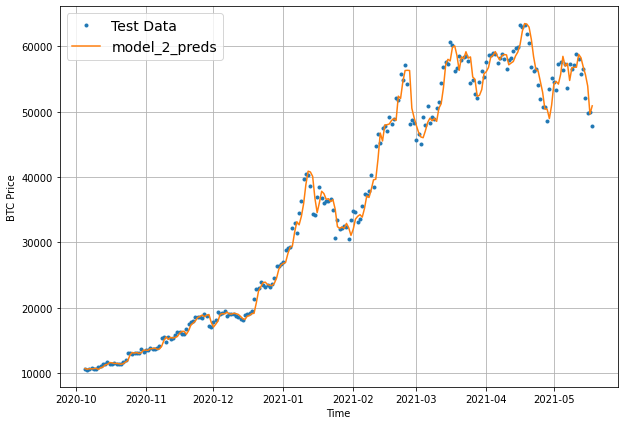

In [64]:
offset = 300
plt.figure(figsize=(10,7))
# account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [65]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window index:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2746, 2747, 2748, ..., 2780, 2781, 2782],
       [2747, 2748, 2749, ..., 2781, 2782, 2783],
       [2748, 2749, 2750, ..., 2782, 2783, 2784]]), (2749, 37))


(2749, 2749)

In [66]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 520, 2229, 520)

In [67]:
# set seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [68]:
# evaluate the model
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1309.1548


1309.15478515625

In [69]:
# Load best version of model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1274.3042


1274.30419921875

In [70]:
# Make predictions
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_preds[:5]

17/17 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[7573.2217, 7439.4707, 7450.2725, 7487.076 , 7416.2227, 7433.364 ,
        7489.0806],
       [7565.723 , 7439.9375, 7393.044 , 7678.644 , 7554.407 , 7431.4893,
        7569.1924],
       [7610.6733, 7420.592 , 7446.1377, 7728.928 , 7621.116 , 7440.8228,
        7642.4663],
       [7420.806 , 7330.133 , 7295.174 , 7566.629 , 7269.908 , 7277.811 ,
        7555.5005],
       [7293.9253, 7253.8774, 7202.8105, 7353.7314, 7325.5513, 7210.656 ,
        7418.7676]], dtype=float32)>

In [71]:
# evaluate model 3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

model_3_results

{'mae': array([ 175.40137 ,  256.44293 ,  358.70102 ,  252.24742 ,  262.42166 ,
         247.48918 ,  243.0173  ,  305.76303 ,  171.23723 ,  246.34676 ,
         297.32965 ,  445.8889  ,  180.71721 ,  121.964775,  123.61126 ,
          82.85205 ,  117.15318 ,   68.84333 ,  110.57143 ,   52.793037,
         117.18792 ,  137.79283 ,  111.433876,  165.78746 ,  149.91615 ,
         254.71931 ,  435.8904  ,  585.044   ,  566.1691  ,  573.5042  ,
         554.46173 ,  458.9285  ,  251.72942 ,  317.1186  ,  393.53732 ,
         474.92975 ,  479.38785 ,  571.97736 ,  537.27484 ,  129.05539 ,
         291.00684 ,  233.80106 ,  407.72684 ,  508.83148 ,  341.38086 ,
         242.82687 ,  318.92758 ,  312.8934  ,  373.24707 ,  517.82336 ,
         682.62976 ,  836.39075 ,  657.5752  ,  333.7221  ,  165.34473 ,
         195.34459 ,  208.55692 ,  236.76479 ,  316.8369  ,  408.4361  ,
         588.73785 ,  460.03168 ,  451.07953 ,  353.78488 ,  232.13658 ,
         238.22322 ,  283.52777 ,  333.4637 

## Make evaluation function work for larger horizon

In [72]:
# Create a function to take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  # ensure float32 data type
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics for longer horizon, reduce to scalar value
  if mae.ndim > 0:
    # find mean of array to get scalar value
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
  }

In [73]:
model_3_preds.shape, test_labels.shape

(TensorShape([520, 7]), (520, 7))

In [74]:
# get model 3 results
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)

model_3_results

{'mae': 1274.3041,
 'mse': 5472502.0,
 'rmse': 1463.6252,
 'mape': 5.540355,
 'mase': 2.2009492}

In [75]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

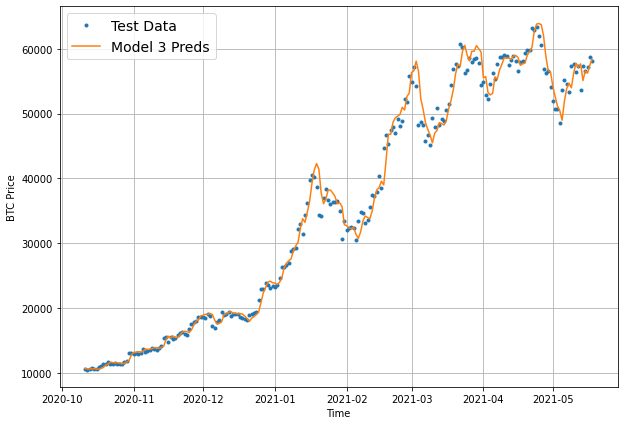

In [76]:
# plot the model
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],  start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), # this is reduced to the mean of the 7 day horizon
                 format="-", 
                 start=offset, 
                 label="Model 3 Preds")

## Which of the models is performing the best so far

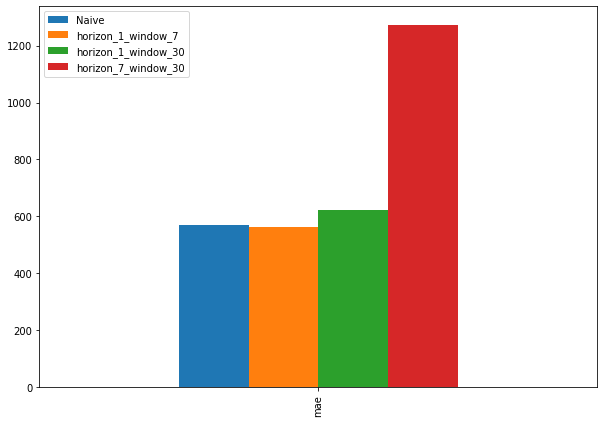

In [77]:
# plot all of the models MAE values in a bar char for comparison
pd.DataFrame({
    "Naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"],
    }, index=["mae"]).plot(figsize=(10,7), kind="bar");

## Model 4: Conv1D

In [78]:
HORIZON=1 # next day
WINDOW_SIZE=7 # use 1 week of data

In [79]:
# Create windowed data set
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window index:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2775, 2776, 2777, ..., 2780, 2781, 2782],
       [2776, 2777, 2778, ..., 2781, 2782, 2783],
       [2777, 2778, 2779, ..., 2782, 2783, 2784]]), (2778, 8))


(2778, 2778)

In [80]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2229, 2229, 549, 549)

Input shape needs to be: `(batch_size, timesteps, input_dim)`

In [81]:
# check data input shape
train_windows[0].shape

(7,)

In [82]:
# Before data is passed to the Conv1D layer, it has to be reshaped
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [83]:
# create a preprocessing layer using a Python lambda function
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # adds an extra dimension for each window

In [84]:
# test out the lambda layer
print(f"Original shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}") 

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [85]:
# set seed
tf.random.set_seed(42)

# create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"), # causal is ideal for temporal data
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# compile model
model_4.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [86]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [87]:
# evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 587.5253


587.5252685546875

In [88]:
# load back best performing weights for model
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.1021


567.1021118164062

In [89]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8756.231 , 8697.727 , 8546.184 , 8480.0625, 8531.183 , 8290.774 ,
       8142.1045, 8085.7427, 7722.7314, 7336.117 ], dtype=float32)>

In [90]:
# evaluate preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)

model_4_results

{'mae': 567.1022,
 'mse': 1174039.0,
 'rmse': 1083.5308,
 'mape': 2.5599117,
 'mase': 1.0012567}

In [91]:
model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

In [92]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 5: RNN (LSTM)

In [93]:
# set seed
tf.random.set_seed(42)

# build model using functional api
input = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(input)
# x = layers.LSTM(128, return_sequences=True)(x) # return_sequences=True to stack LSTM layers
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(input, output, name="model_5_LSTM")

# compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 122ms/step - loss: 2520.9824 - val_loss: 10344.0361
Epoch 2/100
18/18 [==============================] - 2s 96ms/step - loss: 721.0051 - val_loss: 1958.2202
Epoch 3/100
18/18 [==============================] - 2s 94ms/step - loss: 230.0252 - val_loss: 964.5344
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 189.3965 - val_loss: 995.5171
Epoch 5/100
18/18 [==============================] - 5s 298ms/step - loss: 176.1723 - val_loss: 957.9900
Epoch 6/100
18/18 [==============================] - 5s 267ms/step - loss: 172.1007 - val_loss: 942.7665
Epoch 7/100
18/18 [==============================] - 0s 17ms/step - loss: 170.9297 - val_loss: 956.3950
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 168.6705 - val_loss: 944.2108
Epoch 9/100
18/18 [==============================] - 0s 15ms/step - loss: 166.1778 - val_loss: 985.1799
Epoch 10/100
18/18 [==============================] - 3s 

In [94]:
# Load in best version of weights for model_5
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 588.0337


588.03369140625

In [95]:
# make preds with LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8714.693, 8686.048, 8509.644, 8460.578, 8486.454], dtype=float32)>

In [96]:
# eval preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

model_5_results

{'mae': 588.03357,
 'mse': 1227541.9,
 'rmse': 1107.945,
 'mape': 2.6530592,
 'mase': 1.0382125}

In [97]:
model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

## Make a multivariate time series model (same as model 1 except multivariate instead of univariate)

Adding in a secondary feature to support patterns. Block size halves every four years, the inverse relationship between price and supply per block reward is likely a contributor to price.

In [98]:
# Multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [99]:
# add bitcoin halving events to the dataset
block_reward_1 = 50 # 3 Jan 2009 - this block reward isn't in this dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016 
block_reward_4 = 6.25 # 18 May 2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [100]:
# Create date ranges to correlate to block_reward values belong
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [101]:
# add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# add in block_reward values as a feature to the pd.DataFrame
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [102]:
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                Price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,                    Price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

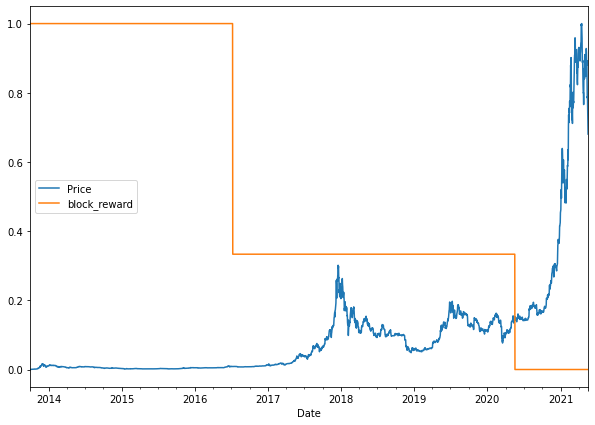

In [103]:
# plot block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset for the multivariate dataset using Pandas

Previously created windowed data by changing 1D array into 2D.

Pandas `DataFrame` is 2D. I'll use the `pd.DataFrame.shift()` method instead.

> Block reward needs to be scaled to match price or vice versa

In [104]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [105]:
# Make a copy of the bitcoin historical data with block_reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Created windows within Pandas by creating columns and shifting the price over. For a set of 7 within the columns, the horizon value is in the associated price column.

In [106]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [107]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [108]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate) model

In [109]:
# set seed
tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# compile
model_6.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# fit
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 59ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
18/18 [==============================] - 0s 23ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
18/18 [==============================] - 0s 23ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
18/18 [==============================] - 0s 

In [110]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [111]:
# evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7440185546875

In [112]:
# Load best version of model weights
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")

model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [113]:
# model 6 preds
model_6_preds = tf.squeeze(model_6.predict(X_test))

model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [114]:
# evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [115]:
model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

In [116]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-BEATS algoritm

Replicating the following paper: https://arxiv.org/abs/1905.10437

### Building and testing the N-BEATS block layer

N-BEATS block layer doesn't exist in TensorFlow. Because of this I will need to subclass Layer to build the custom layer as described in the paper.

In [117]:
# Create NBeatBlock custom layer (subclassing)
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int, 
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # kwargs handles all arguments for the parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers with ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is Theta block with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the back and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]

    return backcast, forecast

In [118]:
# Use dummy inputs and outputs for testing
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE + HORIZON, 
                                       horizon=HORIZON, 
                                       n_neurons=128, 
                                       n_layers=4)

In [119]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # modifying to match the TF Dense layer input expectation
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [120]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# these are the activation outputs of the theta layer (default weights)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm with `tf.data`

Following performant pipeline guide in TensorFlow documentation.

In [121]:
# Set global variables
HORIZON = 1
WINDOW_SIZE = 7

In [122]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [123]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods= i + 1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [124]:
# drop NANs, make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# make train and test sets with indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [125]:
# set up performant pipeline with tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by creating a tuple
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetching
BATCH_SIZE = 1024 # batch_size of the paper that is being replicated
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

Using Table 18 from the paper.

In [126]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

# Residual connections (Doubly residual stacking)

Need two layers for residual connections, subtract and add.

In [127]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [128]:
# subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensor: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensor: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling, and fitting the N-BEATS algorithm

1. Set up instance of N-BEATS block layer `NBeatsBlock` (this will be setup to initialize the network, the stacks will be handled programmatically)
2. Create an input layer for the N-BEATS stack using Functional API
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use `NBeatsBlock` class in for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using the `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses) and `Adam()` optimizer with default learning rate as per the paper
9. Fit the N-BEATS for 5000 epochs using callbacks:
  * EarlyStopping - stop early if not improving
  * Reduce LR on plateau - reduces learning rate if improvements cease

In [129]:
%%time

# set seed
tf.random.set_seed(42)

# set up instance of N-BEATS block
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create an input layer
stack_inputs = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# create intitial backcast and forecast input (backward pred + horizon pred)
residuals, forecast = nbeats_block_layer(stack_inputs)

# create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # first stack is already create in (3)
  # use the NBeatsBlock (to calculate the back and forecast)
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in residuals for subtraction

  # create doubly residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# put together the inputs and outputs
model_7 = tf.keras.Model(inputs=stack_inputs, outputs=forecast, name="model_7_NBEATS")

# compile model with MAE loss
model_7.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# fit the model with EarlyStopping and ReduceLROnPlateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)]
            )



Epoch 658: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1083: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1183: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 24s, sys: 5.66 s, total: 3min 30s
Wall time: 4min 16s


In [130]:
# evaluate N-BEATS model
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 17ms/step - loss: 573.8013


573.8013305664062

In [131]:
# make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8850.651, 8780.959, 9024.833, 8757.087, 8749.681, 8745.466,
       8663.764, 8493.434, 8480.93 , 8510.099], dtype=float32)>

In [132]:
# evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 573.80133,
 'mse': 1163381.8,
 'rmse': 1078.6017,
 'mape': 2.6179163,
 'mase': 1.00801}

In [133]:
model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

### Plotting the N-BEATS architecture

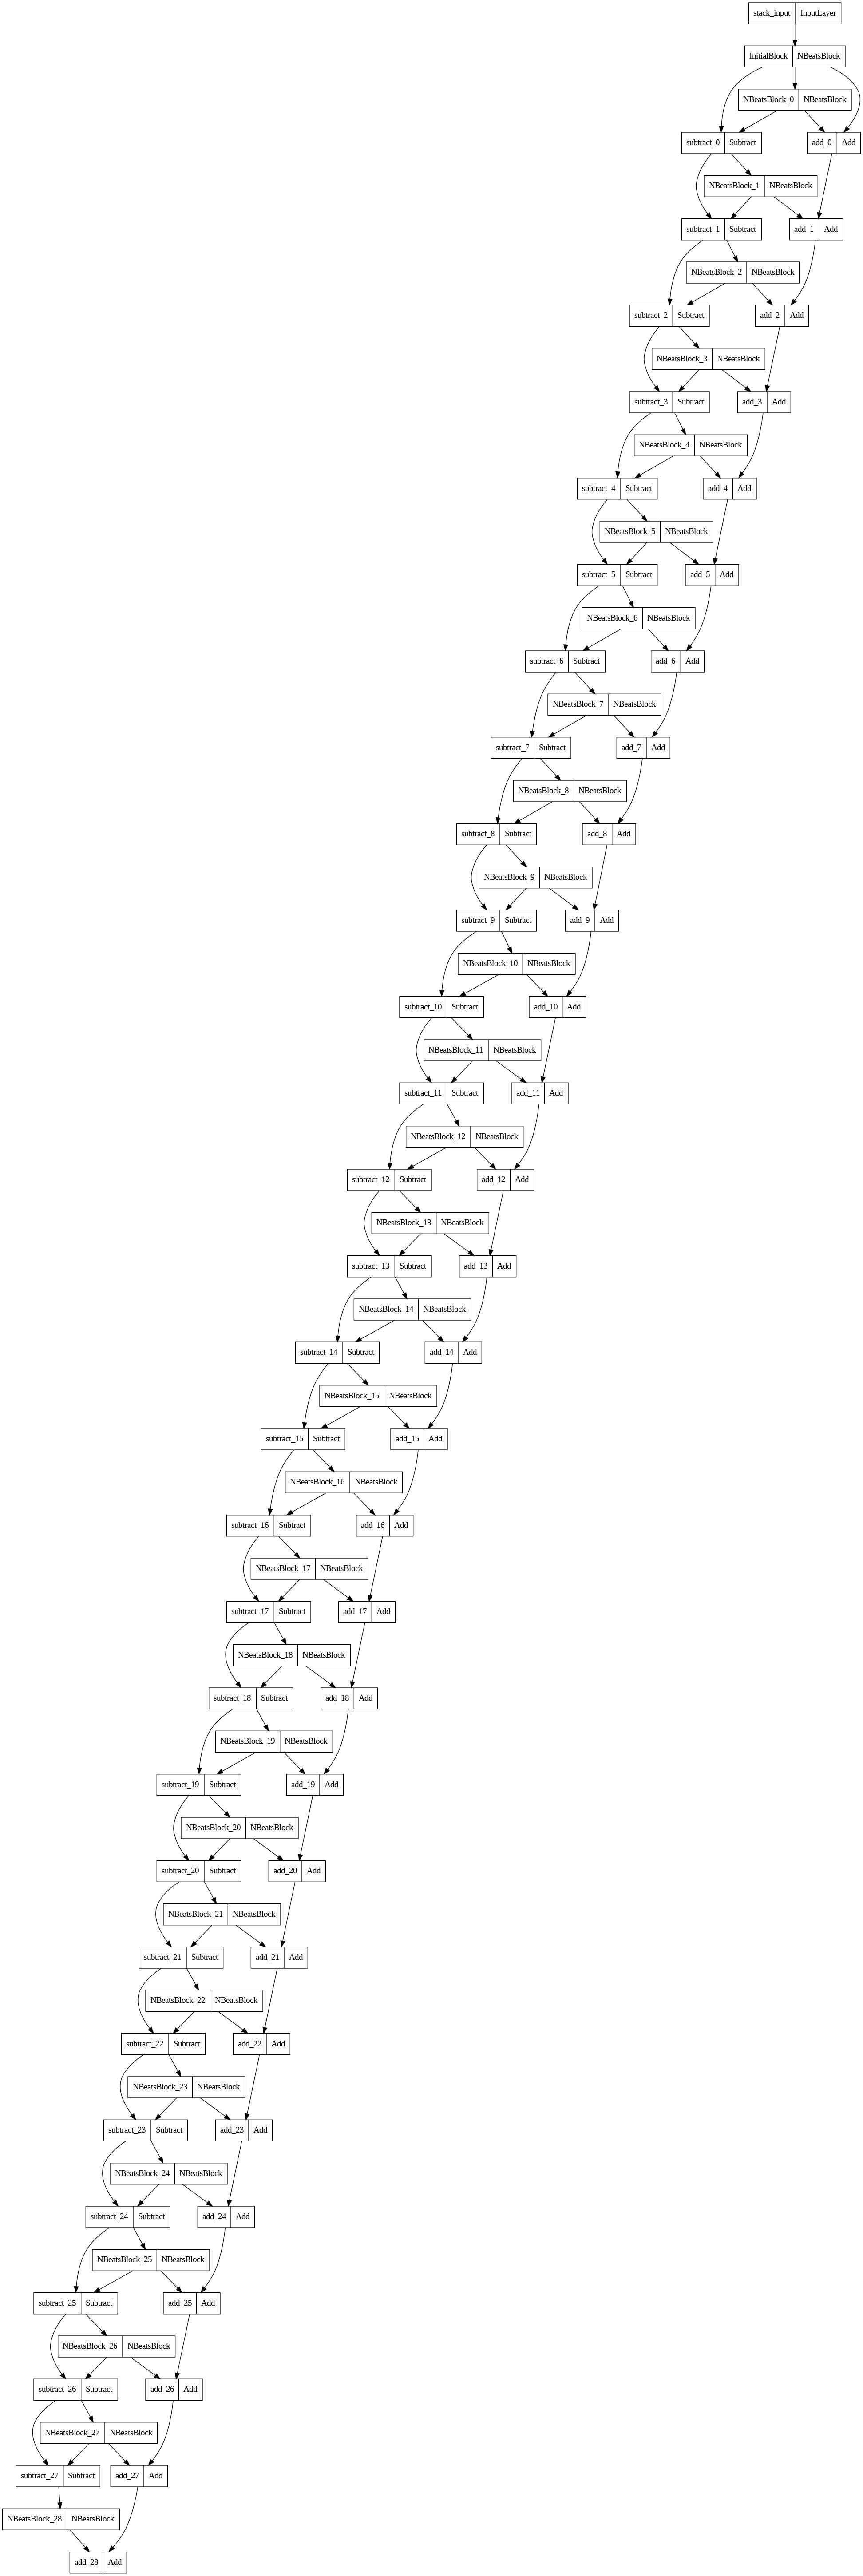

In [134]:
# plot the N-BEATS model and inspect architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Create an ensemble

### Constructing and fitting an ensemble of models (using different loss functions)

In [135]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss,

  For example, if num_iter=10, a list of 30 trained models will be returns:
  10 * len(["mae", "mse", "mape"]).

  """

  # make empty list for train ensemble models
  ensemble_models = []

  # create num_iter number of models per loss function
  for i in range(num_iter):
    # build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}")

      # construct a simple model
      model = tf.keras.Sequential([
          # initialize dense layers with normal distribution
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                verbose=1,
                                                                patience=100)])
      
      # add fitted model to the list
      ensemble_models.append(model)

  return ensemble_models
                             


In [136]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number 0

Epoch 840: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 974: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number 0

Epoch 594: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 710: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 810: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number 1
Optimizing model by reducing: mse for 1000 epochs, model number 1

Epoch 412: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 512: ReduceLROnPlateau

In [137]:
ensemble_models

### make predictions with ensemble model

In [138]:
# create a function which uses a list of trained models to make a dn return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [139]:
%%time
# create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 32ms/step
CPU times: user 615 ms, sys: 32.2 ms, total: 647 ms
Wall time: 757 ms


In [140]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8803.104,  8771.757,  9032.185, ..., 50189.86 , 49186.93 ,
        46576.406],
       [ 8767.257,  8742.635,  9052.529, ..., 49339.4  , 48535.355,
        45338.703],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8906.488,  8746.614,  9021.335, ..., 49364.39 , 49242.05 ,
        46352.72 ],
       [ 8722.468,  8801.62 ,  9096.277, ..., 49544.062, 48486.684,
        45037.445],
       [ 8815.881,  8760.732,  9040.146, ..., 49717.688, 48045.24 ,
        45825.656]], dtype=float32)>

In [141]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8790.848, 8779.064, 9063.025, 8724.374, 8744.041, 8708.527,
       8665.103, 8477.659, 8453.583, 8524.818], dtype=float32)>

In [142]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8785.187, 8777.578, 9056.086, 8717.778, 8738.58 , 8711.18 ,
       8669.543, 8478.887, 8453.453, 8520.713], dtype=float32)

In [143]:
# evaluate ensemble model preds
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)

In [144]:
ensemble_results

{'mae': 566.92456,
 'mse': 1144522.8,
 'rmse': 1069.8237,
 'mape': 2.5783854,
 'mase': 0.9959294}

> `ensemble_mean` is better than `ensemble_preds` or `ensemble_median`

In [145]:
model_1_results

{'mae': 562.1569,
 'mse': 1155685.8,
 'rmse': 1075.0282,
 'mape': 2.5253205,
 'mase': 0.9925255}

### Plotting the prediction intervals (uncertainly estimates)

Providing a range via the prediction interval to know the span the model believes will be the case; e.g., upper and lower bounds.

One way to get 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predicitons from a number of randomly initialized models (ensemble model built earlier)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations from the mean)
4. To get the predicition interval upper and lower bounrs, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [146]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the std by 1.96 (get the 95% prediction band)
  interval = 1.96 * std

  # 4. Get prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval # get negative and positive values for std

  return lower, upper

In [147]:
# get upper and lower bounds of 95% interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8701.564 ,  8716.813 ,  9002.088 ,  8625.344 ,  8647.876 ,
         8645.097 ,  8606.705 ,  8394.714 ,  8391.971 ,  8487.154 ,
         8141.5356,  8039.622 ,  8001.887 ,  7559.398 ,  7194.69  ,
         7205.309 ,  6988.1816,  7136.7817,  7006.979 ,  7463.76  ,
         7283.34  ,  7662.078 ,  7470.4507,  7278.3013,  7247.5176,
         7257.5576,  7148.183 ,  7335.0493,  7454.5615,  7495.333 ,
         7477.4756,  7261.11  ,  7179.58  ,  7148.7393,  7148.999 ,
         7179.2666,  7021.7607,  7048.7065,  6810.809 ,  6544.18  ,
         7286.4253,  7053.244 ,  7072.904 ,  7157.075 ,  7106.296 ,
         7057.724 ,  7154.428 ,  7171.82  ,  7142.478 ,  7160.4473,
         7259.84  ,  7337.383 ,  7186.2812,  7114.286 ,  7123.4497,
         6905.7944,  7226.2686,  7271.137 ,  7311.602 ,  7619.8735,
         7977.682 ,  8073.76  ,  7792.079 ,  8001.376 ,  8012.4956,
         8117.1426,  8011.0444,  8657.03  ,  8780.152 ,  8686.556 ,

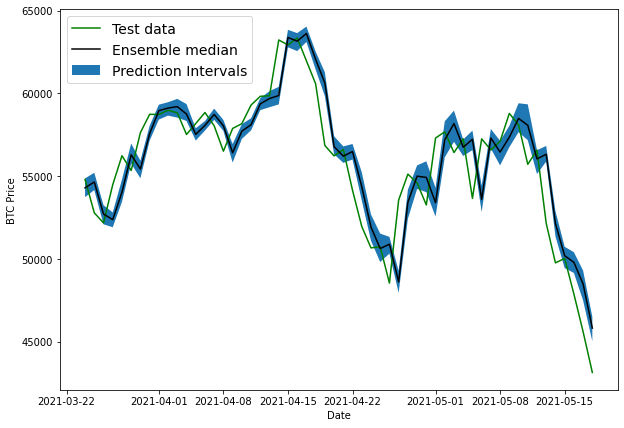

In [148]:
# Get the median/mean values of ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# plot the median of our ensemble preds along with the prediction intervals (where preds fall between)
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

> Model predictions lag behind test data, replicates the same as naive model by appearing to be a single timestep behind.

# Model 9: Train a model on full historical data to make a future prediction

In [149]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [150]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [152]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

# get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [154]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [155]:
# Turn data into efficient tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [157]:
# set seed
tf.random.set_seed(42)

# create model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future")

# compile
model_9.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into the future (not really but future beyond the dataset)

In [159]:
# How many timesteps to predict into the future
INTO_FUTURE = 14

Make a function that:
1. Takes in input:
  * a list of values
  * a trained model
  * a window into the future to predict (horizon)
  * the window size the model was trained on
2. Creates an empty list for future forecasts, returned from function when the list is full and extracts the last `WINDOW_SIZE`
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [200]:
# 1. Create the function for predicting timesteps into the future and updating/retraining the model
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after the value ends.

  Returns future forecasts as a list of floats.
  """

  # 2. Create an empty list for future  forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with the new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

    return last_window

In [201]:
# Make forecasts into future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625



In [202]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [203]:
def get_future_dates(start_date, into_future, offset=1) -> list:
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify startdate, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date

  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end dates

In [204]:
# last timestep fo timesteps (currently in np.datetime64(format))
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [205]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [206]:
# Make forecasts into future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

print(type(future_forecast))

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625

<class 'numpy.ndarray'>


In [208]:
# plot future price predictions
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")



TypeError: ignored

<Figure size 720x504 with 0 Axes>